In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn


In [ ]:
import os
import cv2
import keras
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score



train_path = '/content/drive/MyDrive/project_3/vgg/train/images'
test_path = '/content/drive/MyDrive/project_3/vgg/test'
val_path = '/content/drive/MyDrive/project_3/vgg/val/images'

7321.11-0000
/content/drive/MyDrive/project_3/vgg/train/images/7321.11-0000


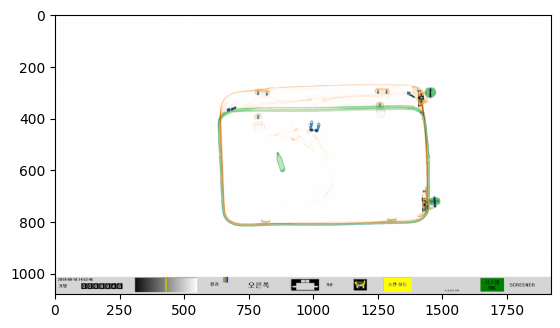

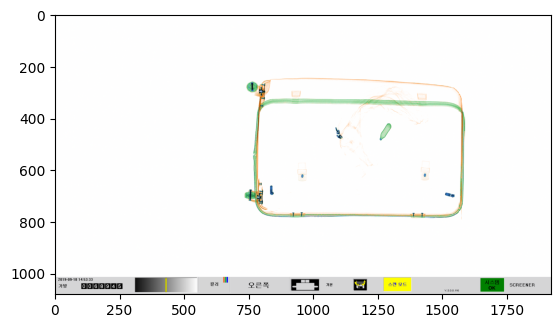

8205.20-0000
/content/drive/MyDrive/project_3/vgg/train/images/8205.20-0000


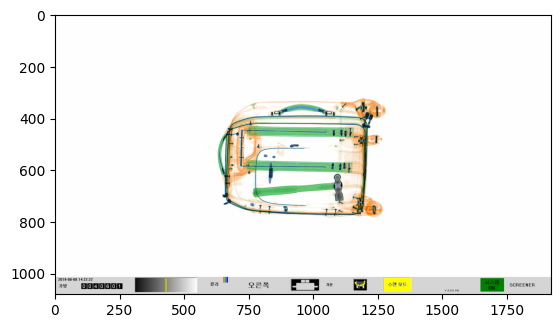

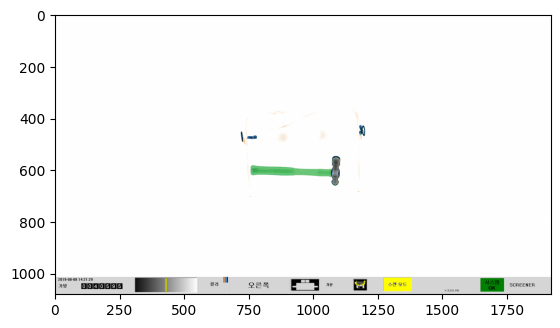

8201.40-0000
/content/drive/MyDrive/project_3/vgg/train/images/8201.40-0000


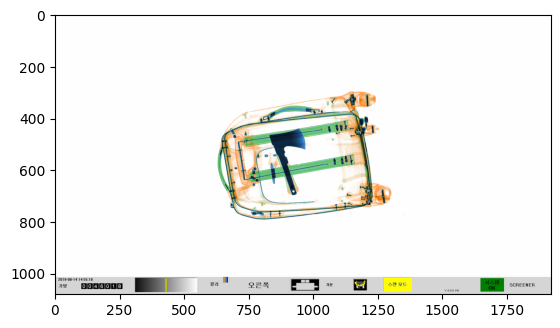

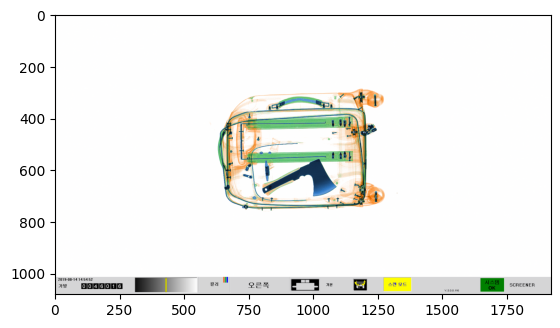

8211.91-0000
/content/drive/MyDrive/project_3/vgg/train/images/8211.91-0000


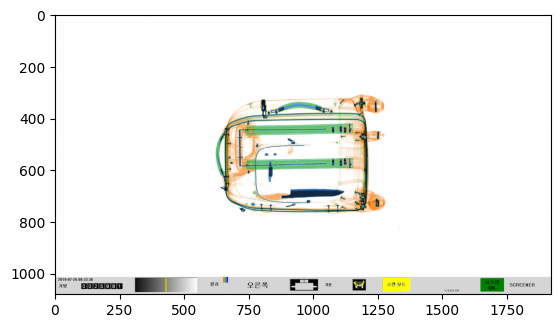

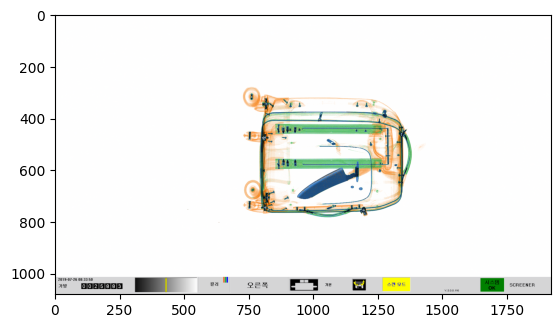

8424.20-1000
/content/drive/MyDrive/project_3/vgg/train/images/8424.20-1000


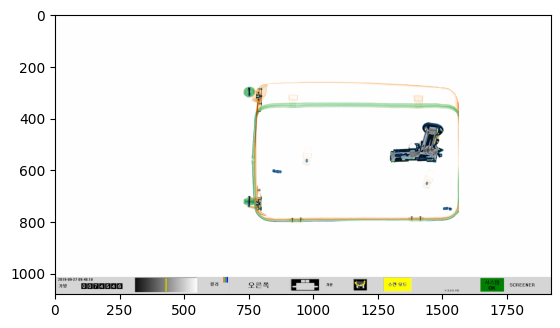

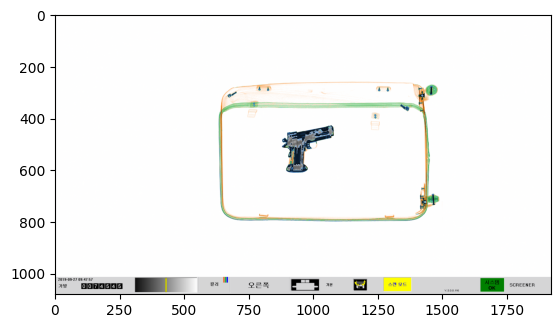

9405.40-9000
/content/drive/MyDrive/project_3/vgg/train/images/9405.40-9000


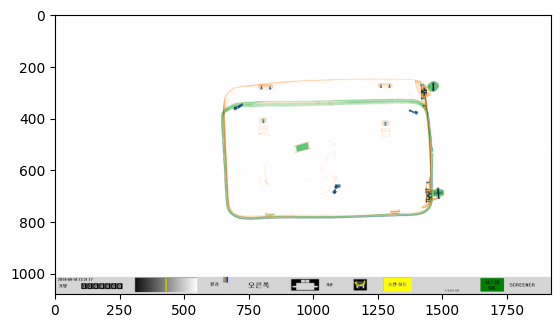

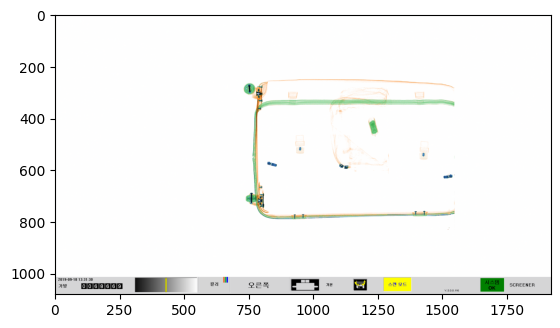

8507.60-9000
/content/drive/MyDrive/project_3/vgg/train/images/8507.60-9000


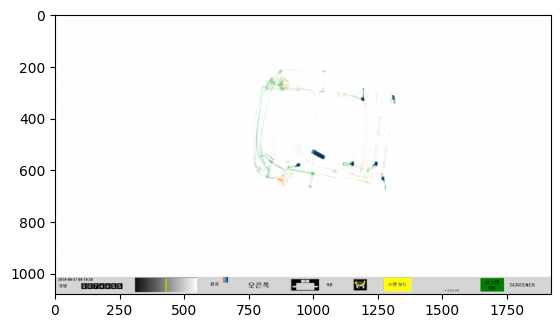

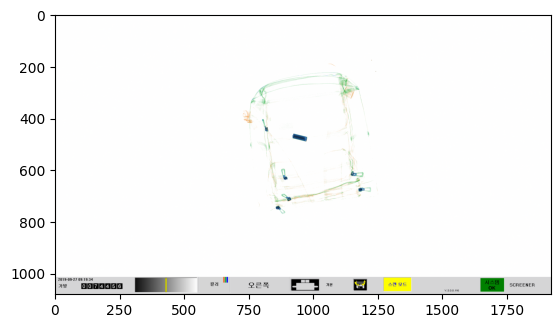

In [ ]:
for folder in os.listdir(train_path):
  sub_path = train_path + '/' + folder

  print(folder)

  for i in range(2):
    temp_path = os.listdir(sub_path)[i]
    temp_path = sub_path + '/' +temp_path
    img = mpimg.imread(temp_path)
    implot = plt.imshow(img)
    plt.show()

9405.40-9000


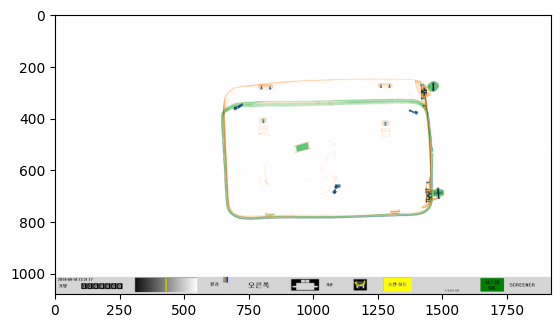

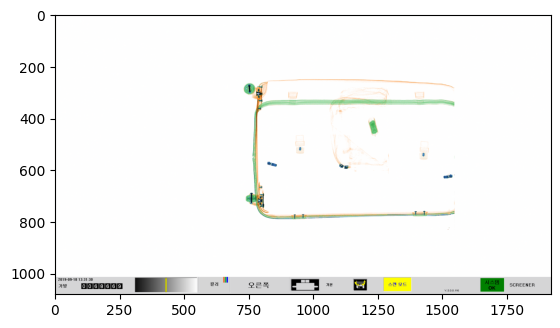

7321.11-0000


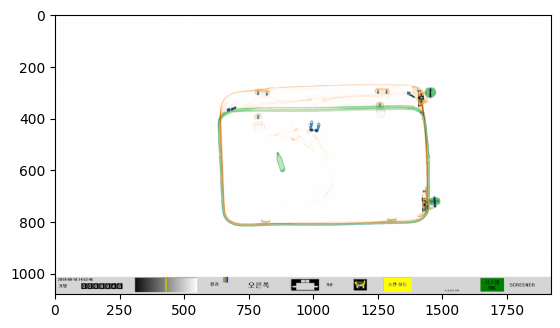

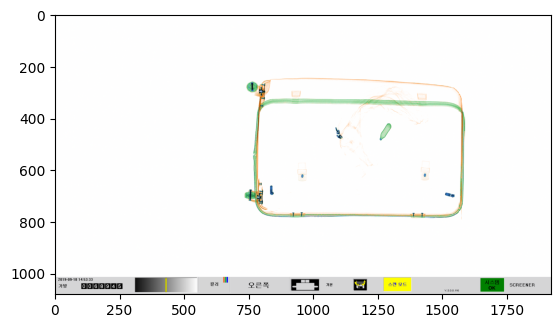

8205.20-0000


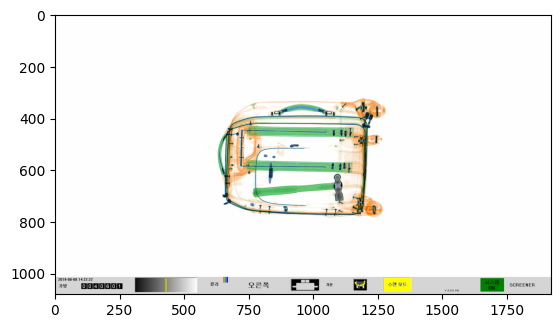

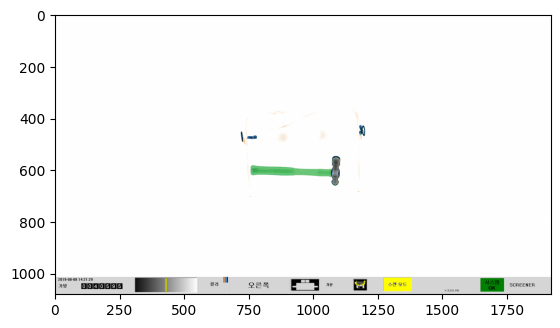

8507.60-9000


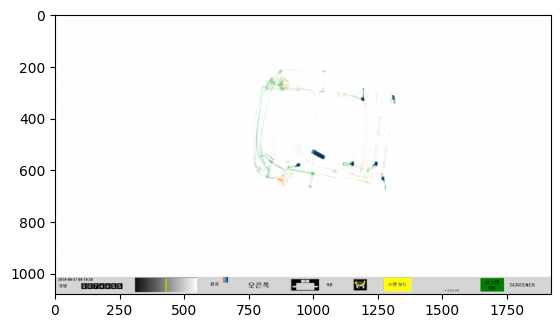

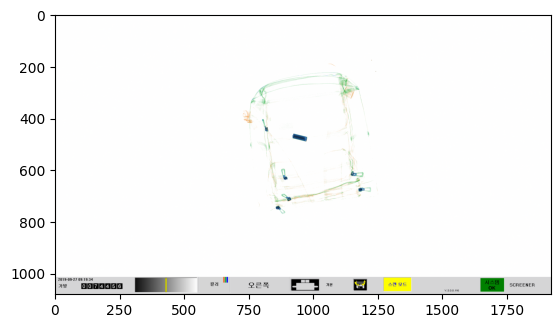

8211.91-0000


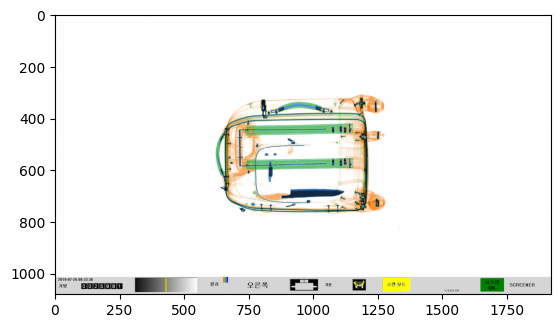

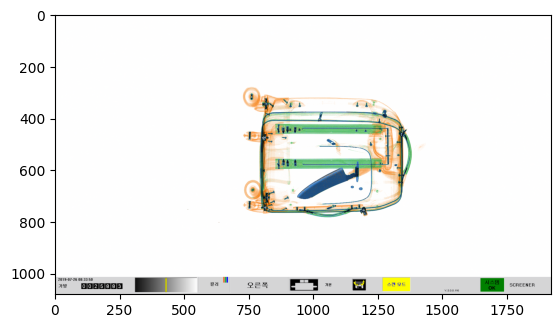

8424.20-1000


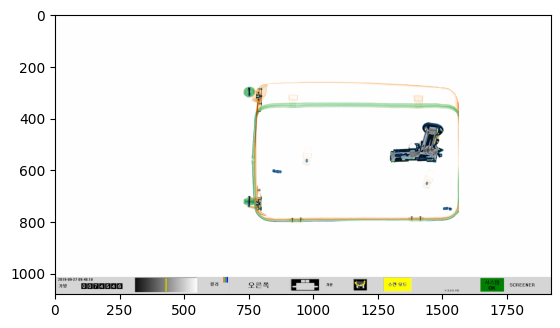

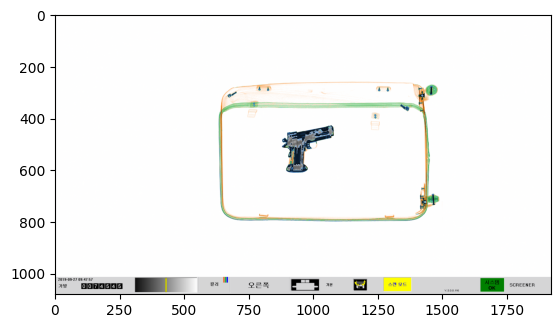

8201.40-0000


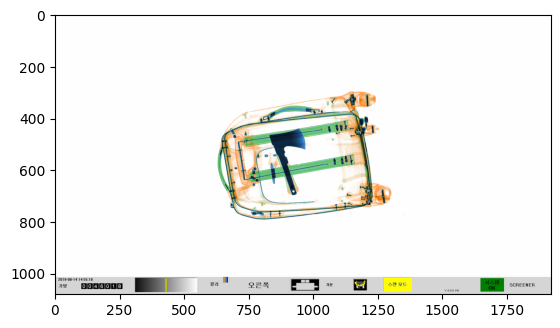

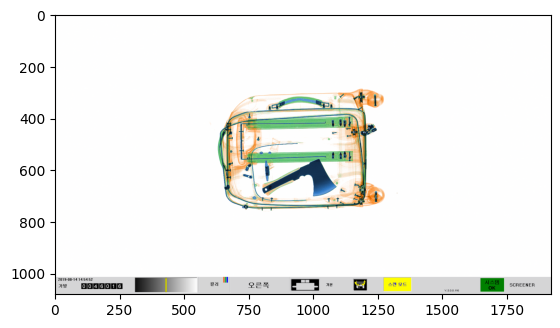

In [ ]:
for folder in os.listdir(test_path):
  sub_path = train_path + '/' + folder

  print(folder)
  for i in range(2):
    temp_path = os.listdir(sub_path)[i]
    temp_path = sub_path + '/' +temp_path
    img = mpimg.imread(temp_path)
    implot = plt.imshow(img)
    plt.show()

7321.11-0000


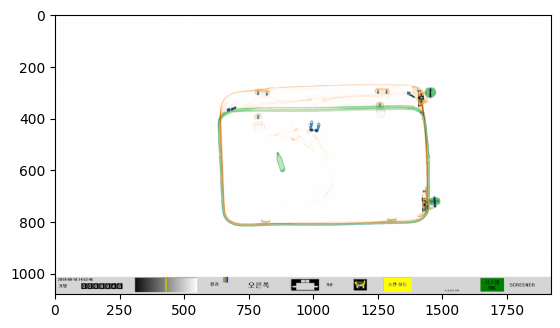

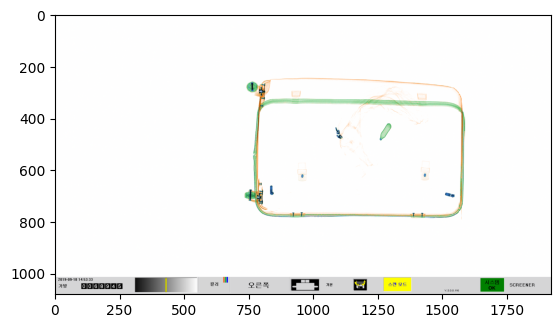

8201.40-0000


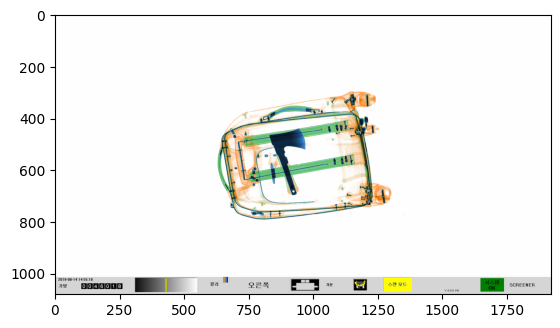

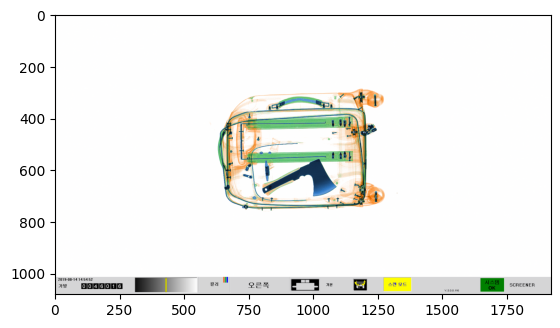

8205.20-0000


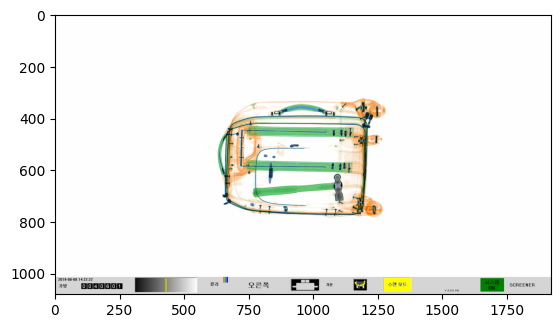

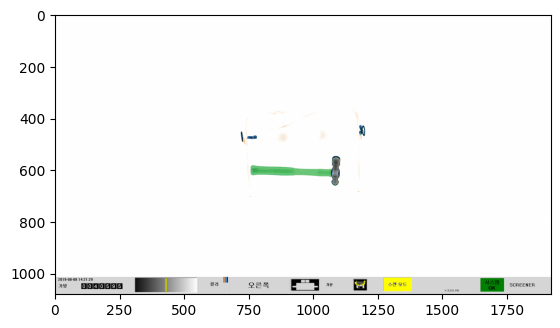

8211.91-0000


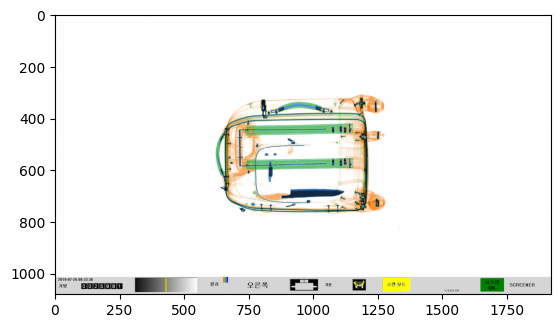

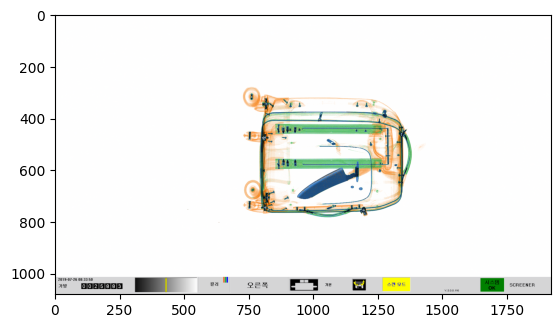

8424.20-1000


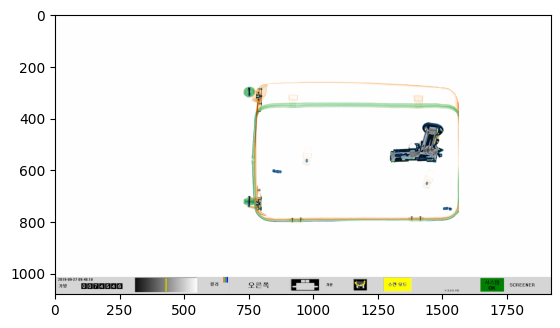

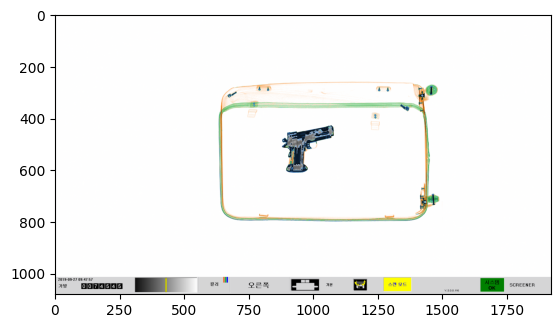

8507.60-9000


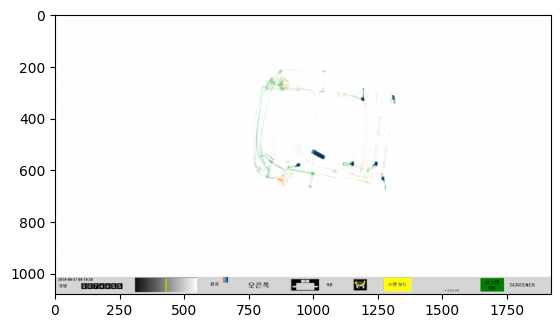

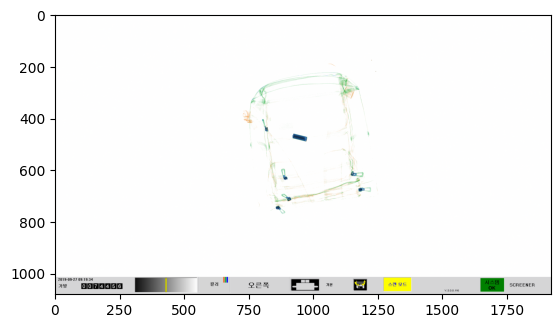

9405.40-9000


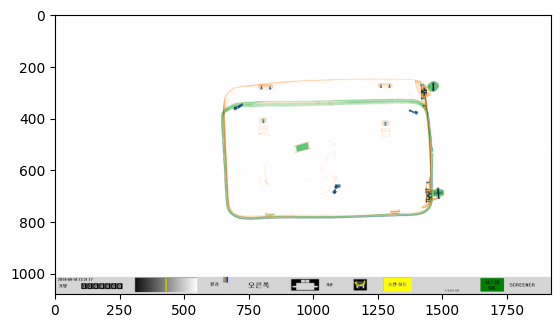

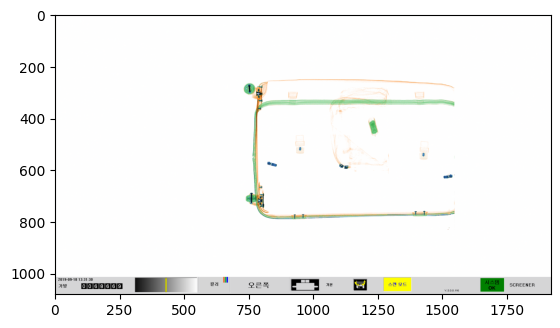

In [ ]:
for folder in os.listdir(val_path):
  sub_path = train_path + '/' + folder

  print(folder)
  for i in range(2):
    temp_path = os.listdir(sub_path)[i]
    temp_path = sub_path + '/' +temp_path
    img = mpimg.imread(temp_path)
    implot = plt.imshow(img)
    plt.show()

In [ ]:
def imagearray(path, size):
  data = []
  for folder in os.listdir(path):
    sub_path = path + '/' + folder

    for img in os.listdir(sub_path):
      image_path = sub_path + '/' + img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr, size)
      data.append(img_arr)

  return data

In [ ]:
size = (250, 250)

In [ ]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [ ]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [ ]:
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [ ]:
x_train

array([[[[1.        , 1.        , 1.        ],
         [1.        , 0.99607843, 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 0.99607843],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 0.99607843, 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 0.99607843],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.84313725, 0.83529412, 0.83529412],
         [0.84313725, 0.83529412, 0.83529412]

In [ ]:
def data_class(data_path, size, class_mode):
  datagen = ImageDataGenerator(rescale = 1./255)
  classes = datagen.flow_from_directory(data_path,
                                        target_size = size,
                                        batch_size = 32,
                                        class_mode = class_mode
                                        )
  return classes

In [ ]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 700 images belonging to 7 classes.
Found 125 images belonging to 7 classes.
Found 140 images belonging to 7 classes.


In [ ]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [ ]:
train_class.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
train_class.class_indices

{'7321.11-0000': 0,
 '8201.40-0000': 1,
 '8205.20-0000': 2,
 '8211.91-0000': 3,
 '8424.20-1000': 4,
 '8507.60-9000': 5,
 '9405.40-9000': 6}

In [ ]:
print('y_train_shape:',  y_train.shape, '\t',
      'y_test_shape:', y_test.shape,'\t',
      'y_val_shape:', y_val.shape)

y_train_shape: (700,) 	 y_test_shape: (125,) 	 y_val_shape: (140,)


#VGG-19 Model

In [ ]:
vgg = VGG19(input_shape = (250, 250, 3), weights= 'imagenet', include_top= False)


In [ ]:
for layer in vgg.layers:
  layer.trainable = False


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(7, activation = 'softmax')(x)


In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

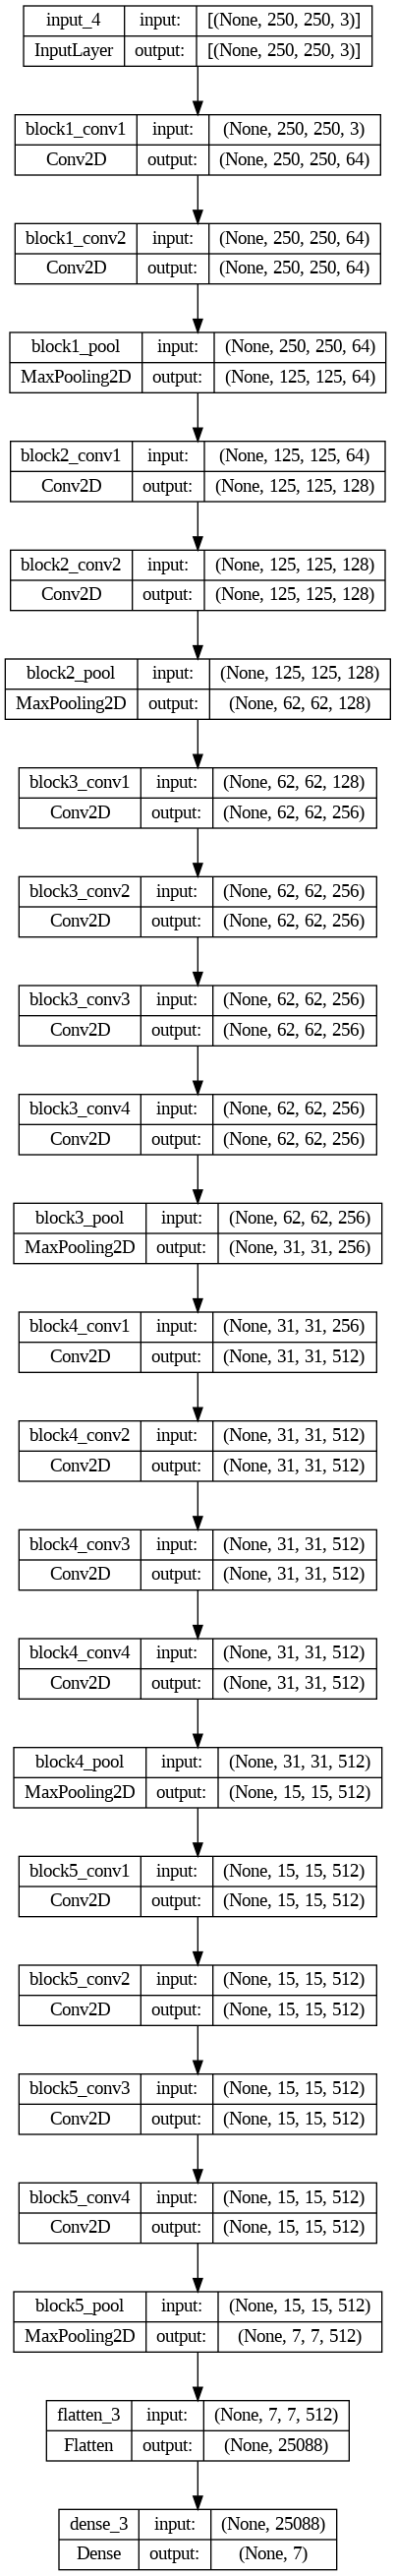

In [ ]:
plot_model(model = model, show_shapes= True)

In [ ]:
# early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
          validation_data = (x_val, y_val),
          epochs = 20,
          # callbacks = [early_stop],
          batch_size = 30,
          shuffle = True
          )

Epoch 1/20
24/24 [==============================] - 6s 239ms/step - loss: 1.9515 - accuracy: 0.3214 - val_loss: 1.4614 - val_accuracy: 0.3929
Epoch 2/20
24/24 [==============================] - 6s 236ms/step - loss: 0.9350 - accuracy: 0.6300 - val_loss: 1.1726 - val_accuracy: 0.4786
Epoch 3/20
24/24 [==============================] - 5s 217ms/step - loss: 0.7511 - accuracy: 0.7100 - val_loss: 1.3326 - val_accuracy: 0.3929
Epoch 4/20
24/24 [==============================] - 6s 236ms/step - loss: 0.5568 - accuracy: 0.8143 - val_loss: 1.3190 - val_accuracy: 0.4786
Epoch 5/20
24/24 [==============================] - 5s 220ms/step - loss: 0.5133 - accuracy: 0.8143 - val_loss: 1.1767 - val_accuracy: 0.5143
Epoch 6/20
24/24 [==============================] - 5s 219ms/step - loss: 0.4174 - accuracy: 0.8643 - val_loss: 1.3603 - val_accuracy: 0.4571
Epoch 7/20
24/24 [==============================] - 5s 223ms/step - loss: 0.4262 - accuracy: 0.8486 - val_loss: 1.4422 - val_accuracy: 0.5429
Epoch 

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.title('Loss')
plt.show()

# Model Evaluation

In [ ]:
model.evaluate(x_test, y_test, batch_size=32)

4/4 [==============================] - 1s 184ms/step - loss: 4.4289 - accuracy: 0.2640


[4.428882598876953, 0.2639999985694885]

In [ ]:
y_pred = model.predict(x_test)

4/4 [==============================] - 1s 180ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis = 1)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.10      0.25      0.14         8
           2       0.05      0.05      0.05        21
           3       0.75      0.54      0.63        28
           4       0.75      0.75      0.75        20
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        10

    accuracy                           0.26       125
   macro avg       0.24      0.23      0.22       125
weighted avg       0.30      0.26      0.28       125



# Confusion Matrix

[Text(0, 0.5, '7321.11-0000'),
 Text(0, 1.5, '8201.40-0000'),
 Text(0, 2.5, '8205.20-0000'),
 Text(0, 3.5, '8211.91-0000'),
 Text(0, 4.5, '8424.20-1000'),
 Text(0, 5.5, '8507.60-9000'),
 Text(0, 6.5, '9405.40-9000')]

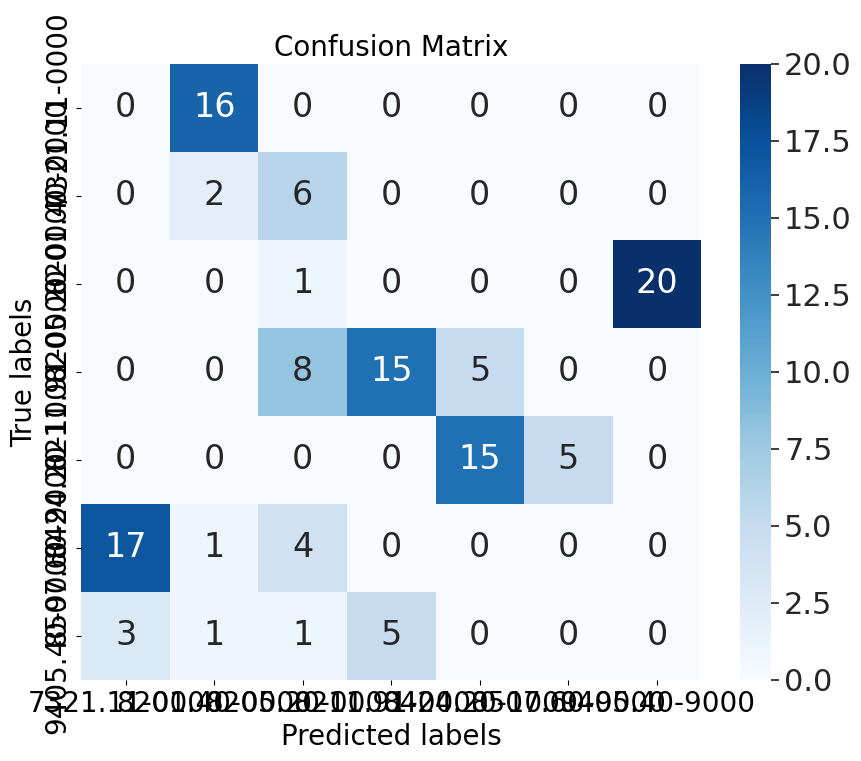

In [ ]:
cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize = (10, 8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'Blues', ax = ax)

ax.set_xlabel('Predicted labels', fontsize=20)
ax.set_ylabel('True labels', fontsize = 20)
ax.set_title('Confusion Matrix', fontsize = 20)
ax.xaxis.set_ticklabels(
    ['7321.11-0000',
     '8201.40-0000',
     '8205.20-0000',
     '8211.91-0000',
     '8424.20-1000',
     '8507.60-9000',
     '9405.40-9000'],
    fontsize=20
    )
ax.yaxis.set_ticklabels(
    ['7321.11-0000',
     '8201.40-0000',
     '8205.20-0000',
     '8211.91-0000',
     '8424.20-1000',
     '8507.60-9000',
     '9405.40-9000'],
    fontsize=20
    )

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.264

In [ ]:
recall_score(y_test, y_pred, average='weighted')

0.264

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.264